## MJO example notebook

This notebook contains an example of access to a dataset of daily ERA5 data and simple Hovmoller plot of the MJO for a short period.

This is a diagnostic not operative yet, a proper command line is still missing and this notebook can be used for a quick evaluation of a daily dataset.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from aqua.diagnostics.teleconnections import MJO, PlotMJO

We create a dictionary with the Reader info to retrieve the data, we specify also a time range for the Hovmollwer plot.

In [3]:
init_dict = {
    'catalog': 'obs',
    'model': 'ERA5',
    'exp': 'era5',
    'source': 'daily',
    'regrid': 'r025',
    'loglevel': 'DEBUG',
    'startdate': '20210101',
    'enddate': '20210630',
}         

In [4]:
mjo = MJO(**init_dict)

2025-05-29 19:54:51 :: Diagnostic :: DEBUG    -> Loading definition file: /users/mattnuri/.aqua/diagnostics/teleconnections/definitions/teleconnections-destine.yaml


As first step we retrieve the data. The variable is set in the definition file in the folder `/config/diagnostics/teleconnections/definitions/`, where the sign and the time axis position is set.

In [5]:
mjo.retrieve()

2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/mattnuri/.aqua
2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> Configuration file found in /users/mattnuri/.aqua/config-aqua.yaml
2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> Available catalogs are ['obs']
2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> Default catalog will be obs
2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> Catalog file is /users/mattnuri/.aqua/catalogs/obs/catalog.yaml
2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> Machine file is /users/mattnuri/.aqua/catalogs/obs/machine.yaml
2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to lumi
2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to lumi
2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> Browsing catalog obs ...
2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> Cat

2025-05-29 19:56:00 :: ConfigPath :: INFO     -> ERA5_era5_daily triplet found in in obs!
2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> Final catalog to be used is obs
2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> Catalog file is /users/mattnuri/.aqua/catalogs/obs/catalog.yaml
2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> Machine file is /users/mattnuri/.aqua/catalogs/obs/machine.yaml
2025-05-29 19:56:00 :: ConfigPath :: DEBUG    -> No paths found in the main configuration file {'obs': {'catalog': ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs'], 'machine': 'lumi', 'reader': {'catalog': '/users/mattnuri/.aqua/catalogs/obs/catalog.yaml', 'machine': '/users/mattnuri/.aqua/catalogs/obs/machine.yaml', 'fixer': '/users/mattnuri/.aqua/fixes', 'regrid': '/users/mattnuri/.aqua/grids'}, 'options': {'style': 'aqua'}}}
2025-05-29 19:56:00 :: yaml :: DEBUG    -> Creating a new dictionary
2025-05-29 19:56:00 :: yaml :: DEBUG    -> Fold

We then compute the data ready to be used in the Hovmoller plot, with a lat selection from -15 to +15. Netcdf saving options are available as in the NAO and ENSO notebooks.

In [6]:
mjo.compute_hovmoller()

2025-05-29 19:56:54 :: MJO :: INFO     -> Flipping the sign of the variable.


Similarly to the other diagnostics a plot class is available and it requires only the data produced and stored in the `data_hovmoller` attribute to plot.

In [7]:
plot = PlotMJO(mjo.data_hovmoller)

The plot_hovmoller function will produce the plot.
Description and more complete methods to integrate in the CLI are under development.

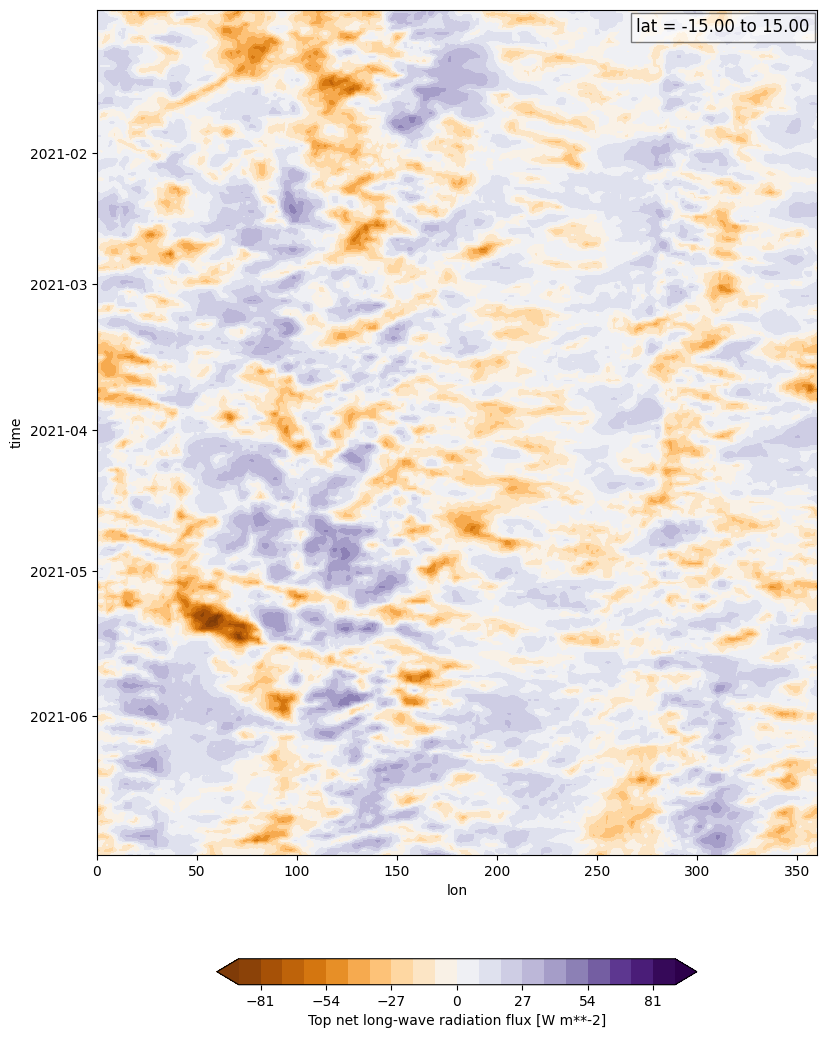

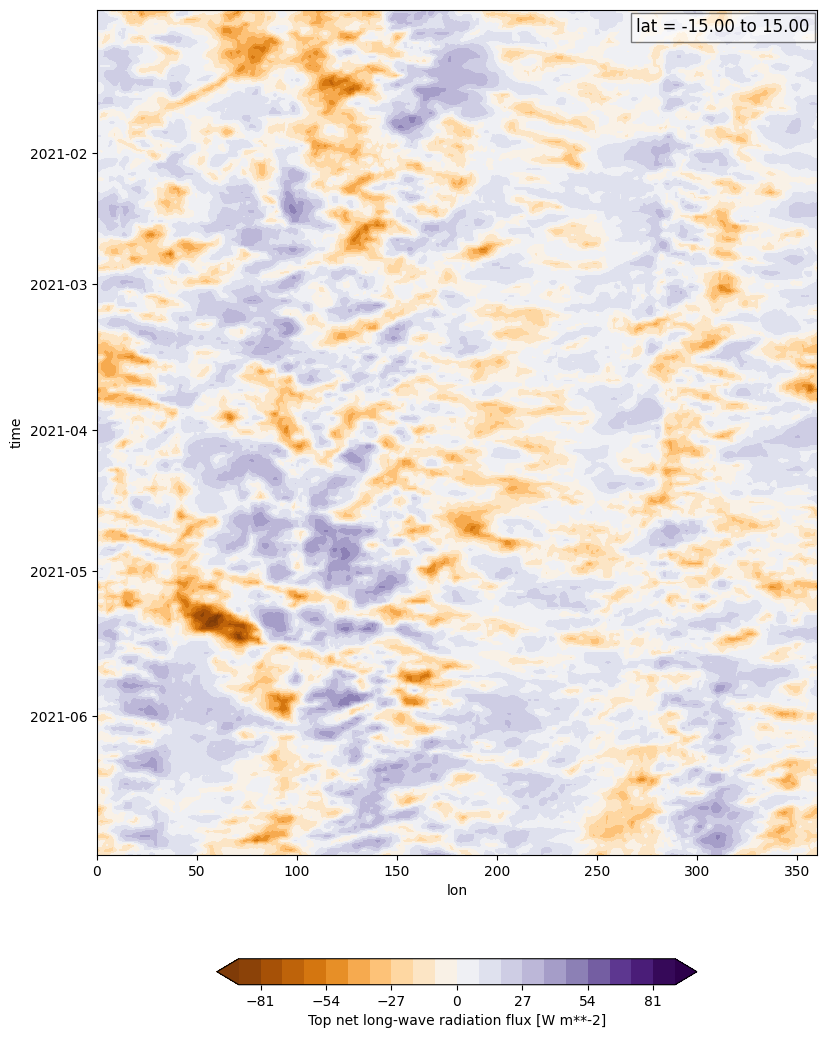

In [8]:
plot.plot_hovmoller()